In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Projects/GSSoC/Linear Regression - Predicting House Prices From Kolkata Dataset/")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("Kolkata.csv")

In [ ]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df.columns.values

array(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi',
       "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6507 non-null   int64 
 1   Area                 6507 non-null   int64 
 2   Location             6507 non-null   object
 3   No. of Bedrooms      6507 non-null   int64 
 4   Resale               6507 non-null   int64 
 5   MaintenanceStaff     6507 non-null   int64 
 6   Gymnasium            6507 non-null   int64 
 7   SwimmingPool         6507 non-null   int64 
 8   LandscapedGardens    6507 non-null   int64 
 9   JoggingTrack         6507 non-null   int64 
 10  RainWaterHarvesting  6507 non-null   int64 
 11  IndoorGames          6507 non-null   int64 
 12  ShoppingMall         6507 non-null   int64 
 13  Intercom             6507 non-null   int64 
 14  SportsFacility       6507 non-null   int64 
 15  ATM                  6507 non-null   int64 
 16  ClubHo

### Checking for Null values

In [ ]:
df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [ ]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,...,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000
mean,8.508570e+06,1344.166897,2.631166,0.311818,8.899032,8.903028,8.901644,8.901644,8.900415,8.899493,...,8.905025,8.897034,8.899339,8.897034,8.896727,8.896727,8.896880,8.897034,8.896266,8.897034
std,1.465939e+07,807.698043,0.712283,0.463272,0.936229,0.899654,0.912482,0.912482,0.923734,0.932083,...,0.880791,0.953984,0.933467,0.953984,0.956686,0.956686,0.955336,0.953984,0.960724,0.953984
min,2.000000e+06,350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000e+06,920.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,4.940000e+06,1144.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,8.000000e+06,1454.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,5.040000e+08,10000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### The Max number of bedrooms is 9, but the mean is 2.6, that means the data is skewed. Let's plot 

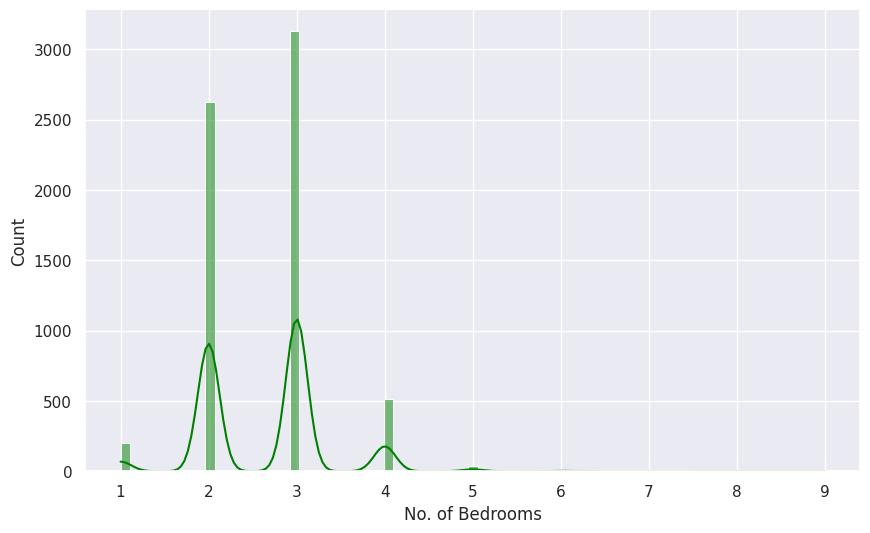

In [ ]:
plt.figure(figsize= (10, 6))
sns.histplot(df['No. of Bedrooms'], color = 'green', kde= True);

### The data is somewhat is skewed, with most houses in Kolkata having 2-3 bedrooms.

In [ ]:
df['No. of Bedrooms'].fillna(df['No. of Bedrooms'].median(), inplace= True)

### Exploratory Data Analysis with a Heat Map

<ipython-input-65-93d5c51a72c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')


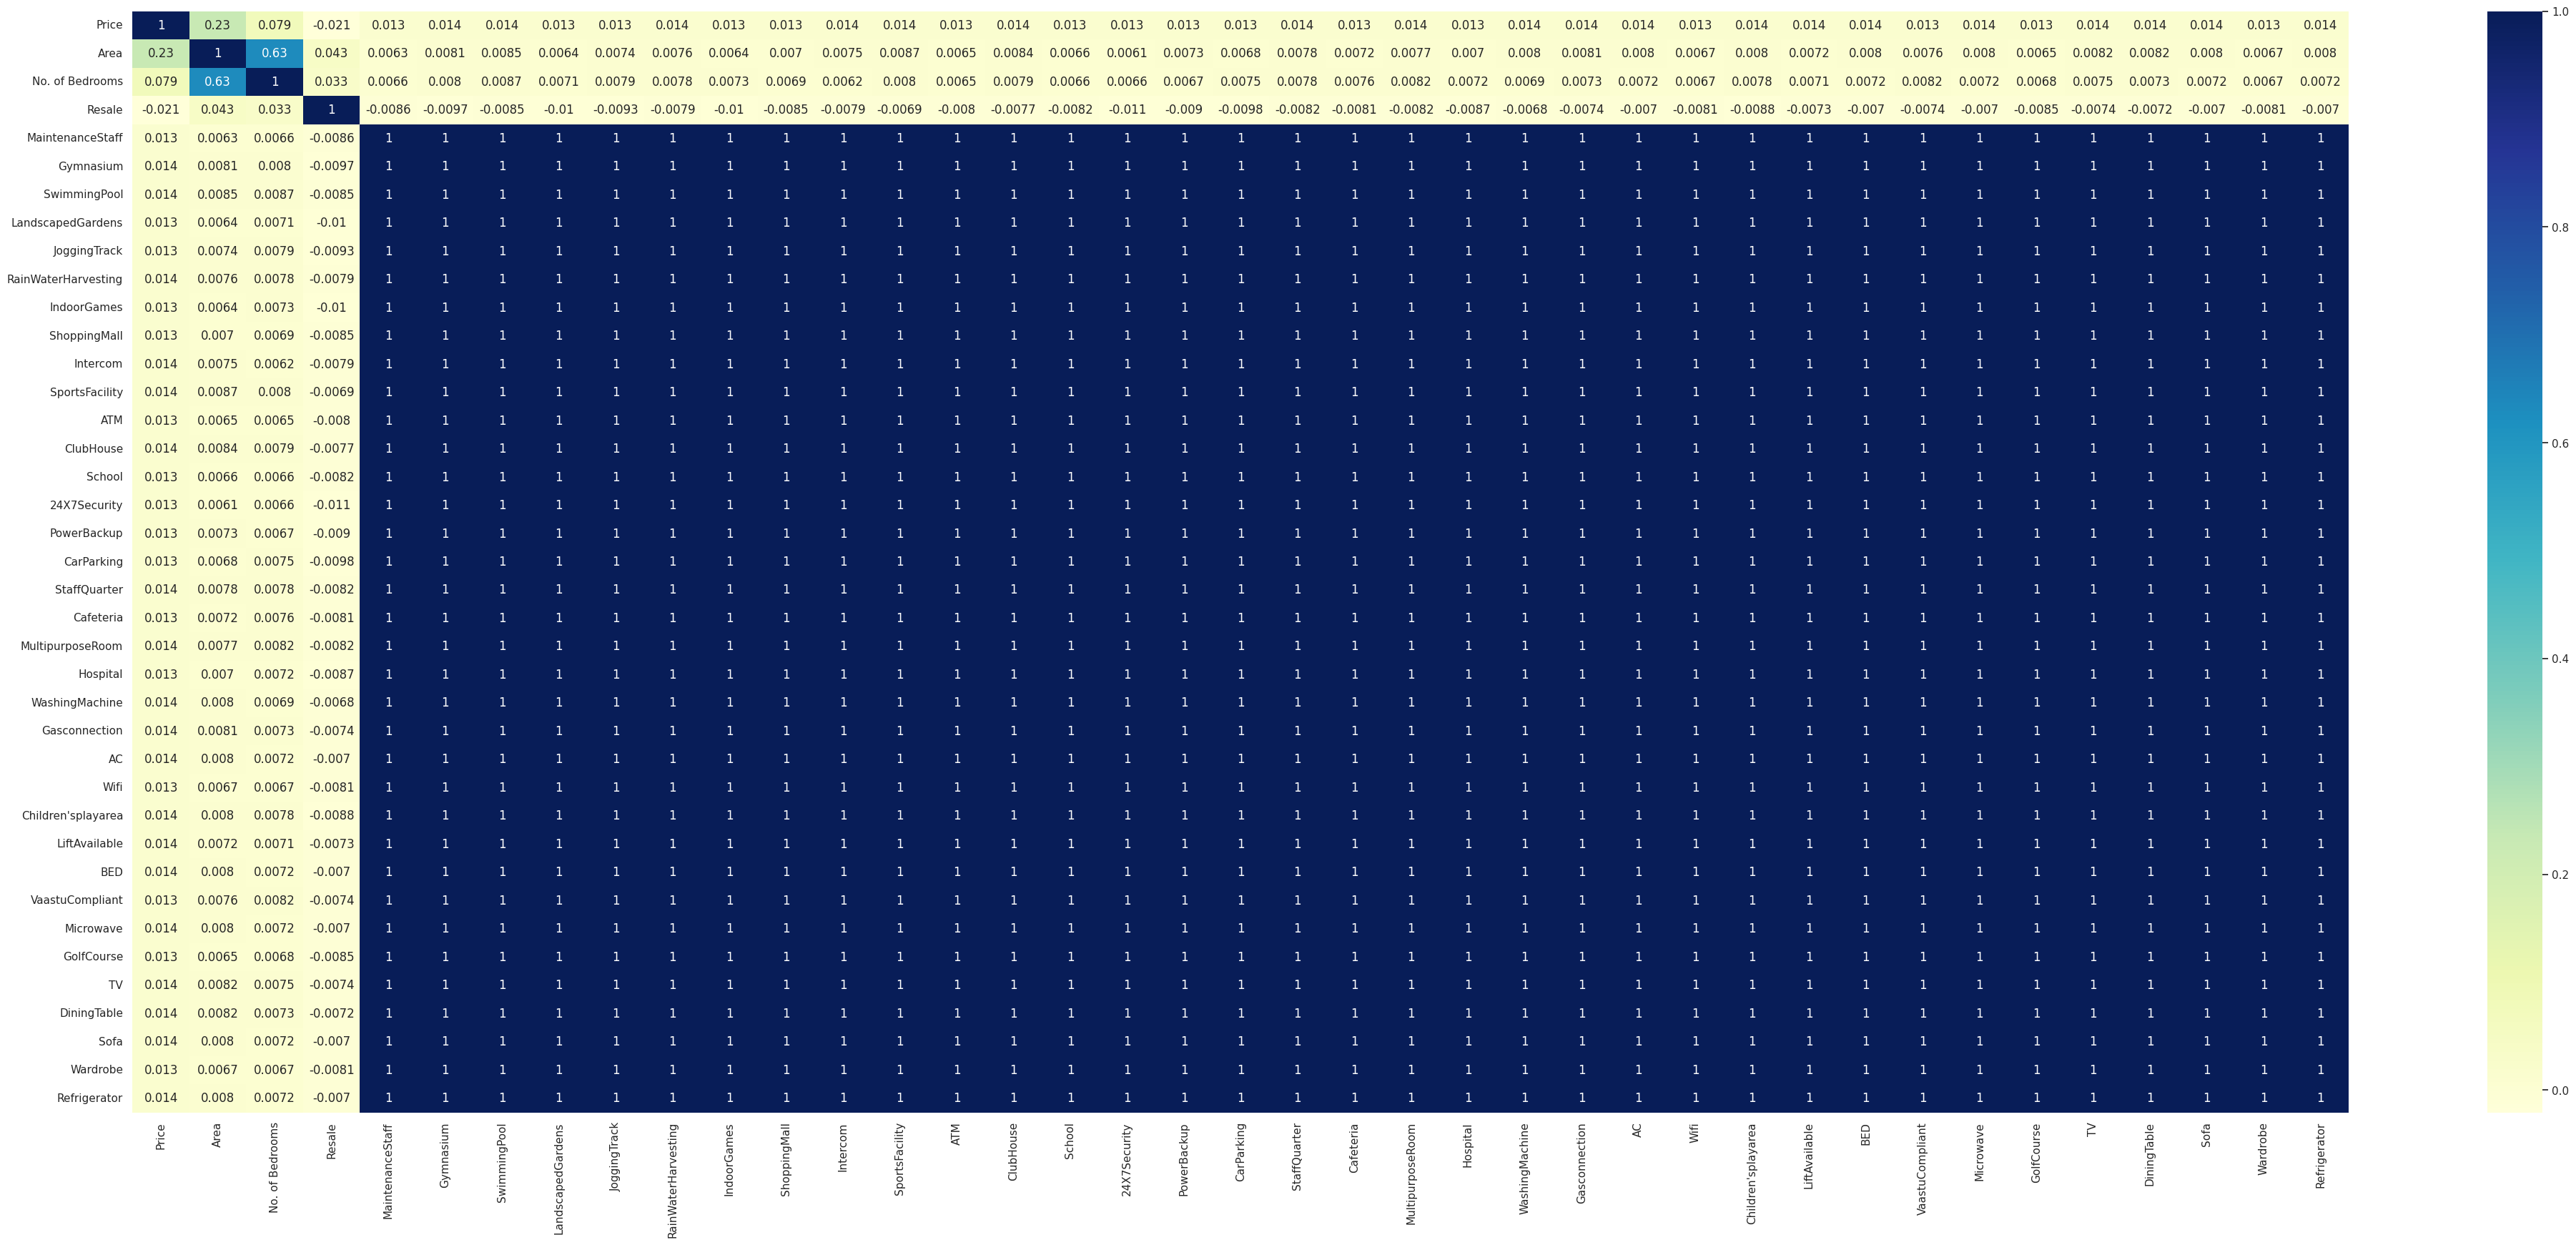

In [ ]:
plt.figure(figsize= (50, 20))
sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')
plt.show()

### From this Heatmap it is clear that Area is our most important feature.

### Let's examine the target variable "Price"

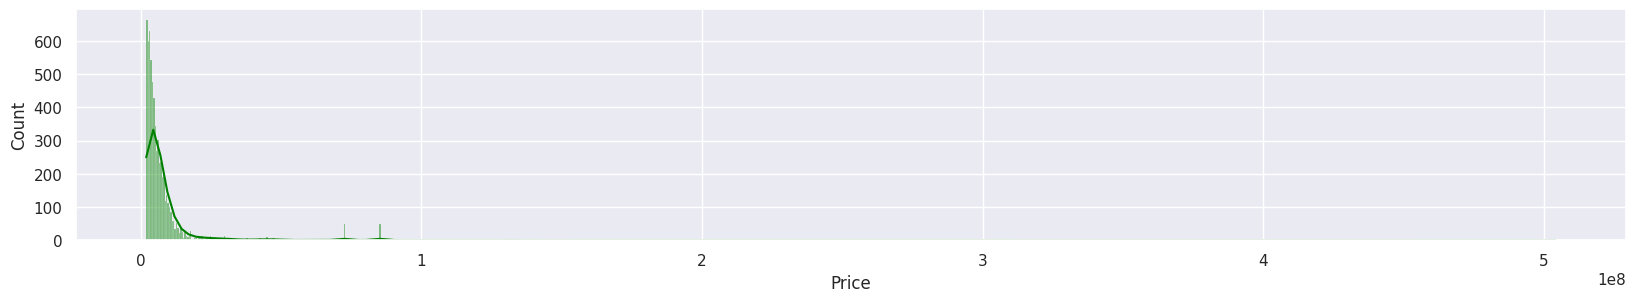

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.histplot(df['Price'], color = 'green', ax=ax, kde= True);

In [ ]:
df['Price'].skew()

10.059830369036138

### The target variable is very skewed, let's check the other independent attributes

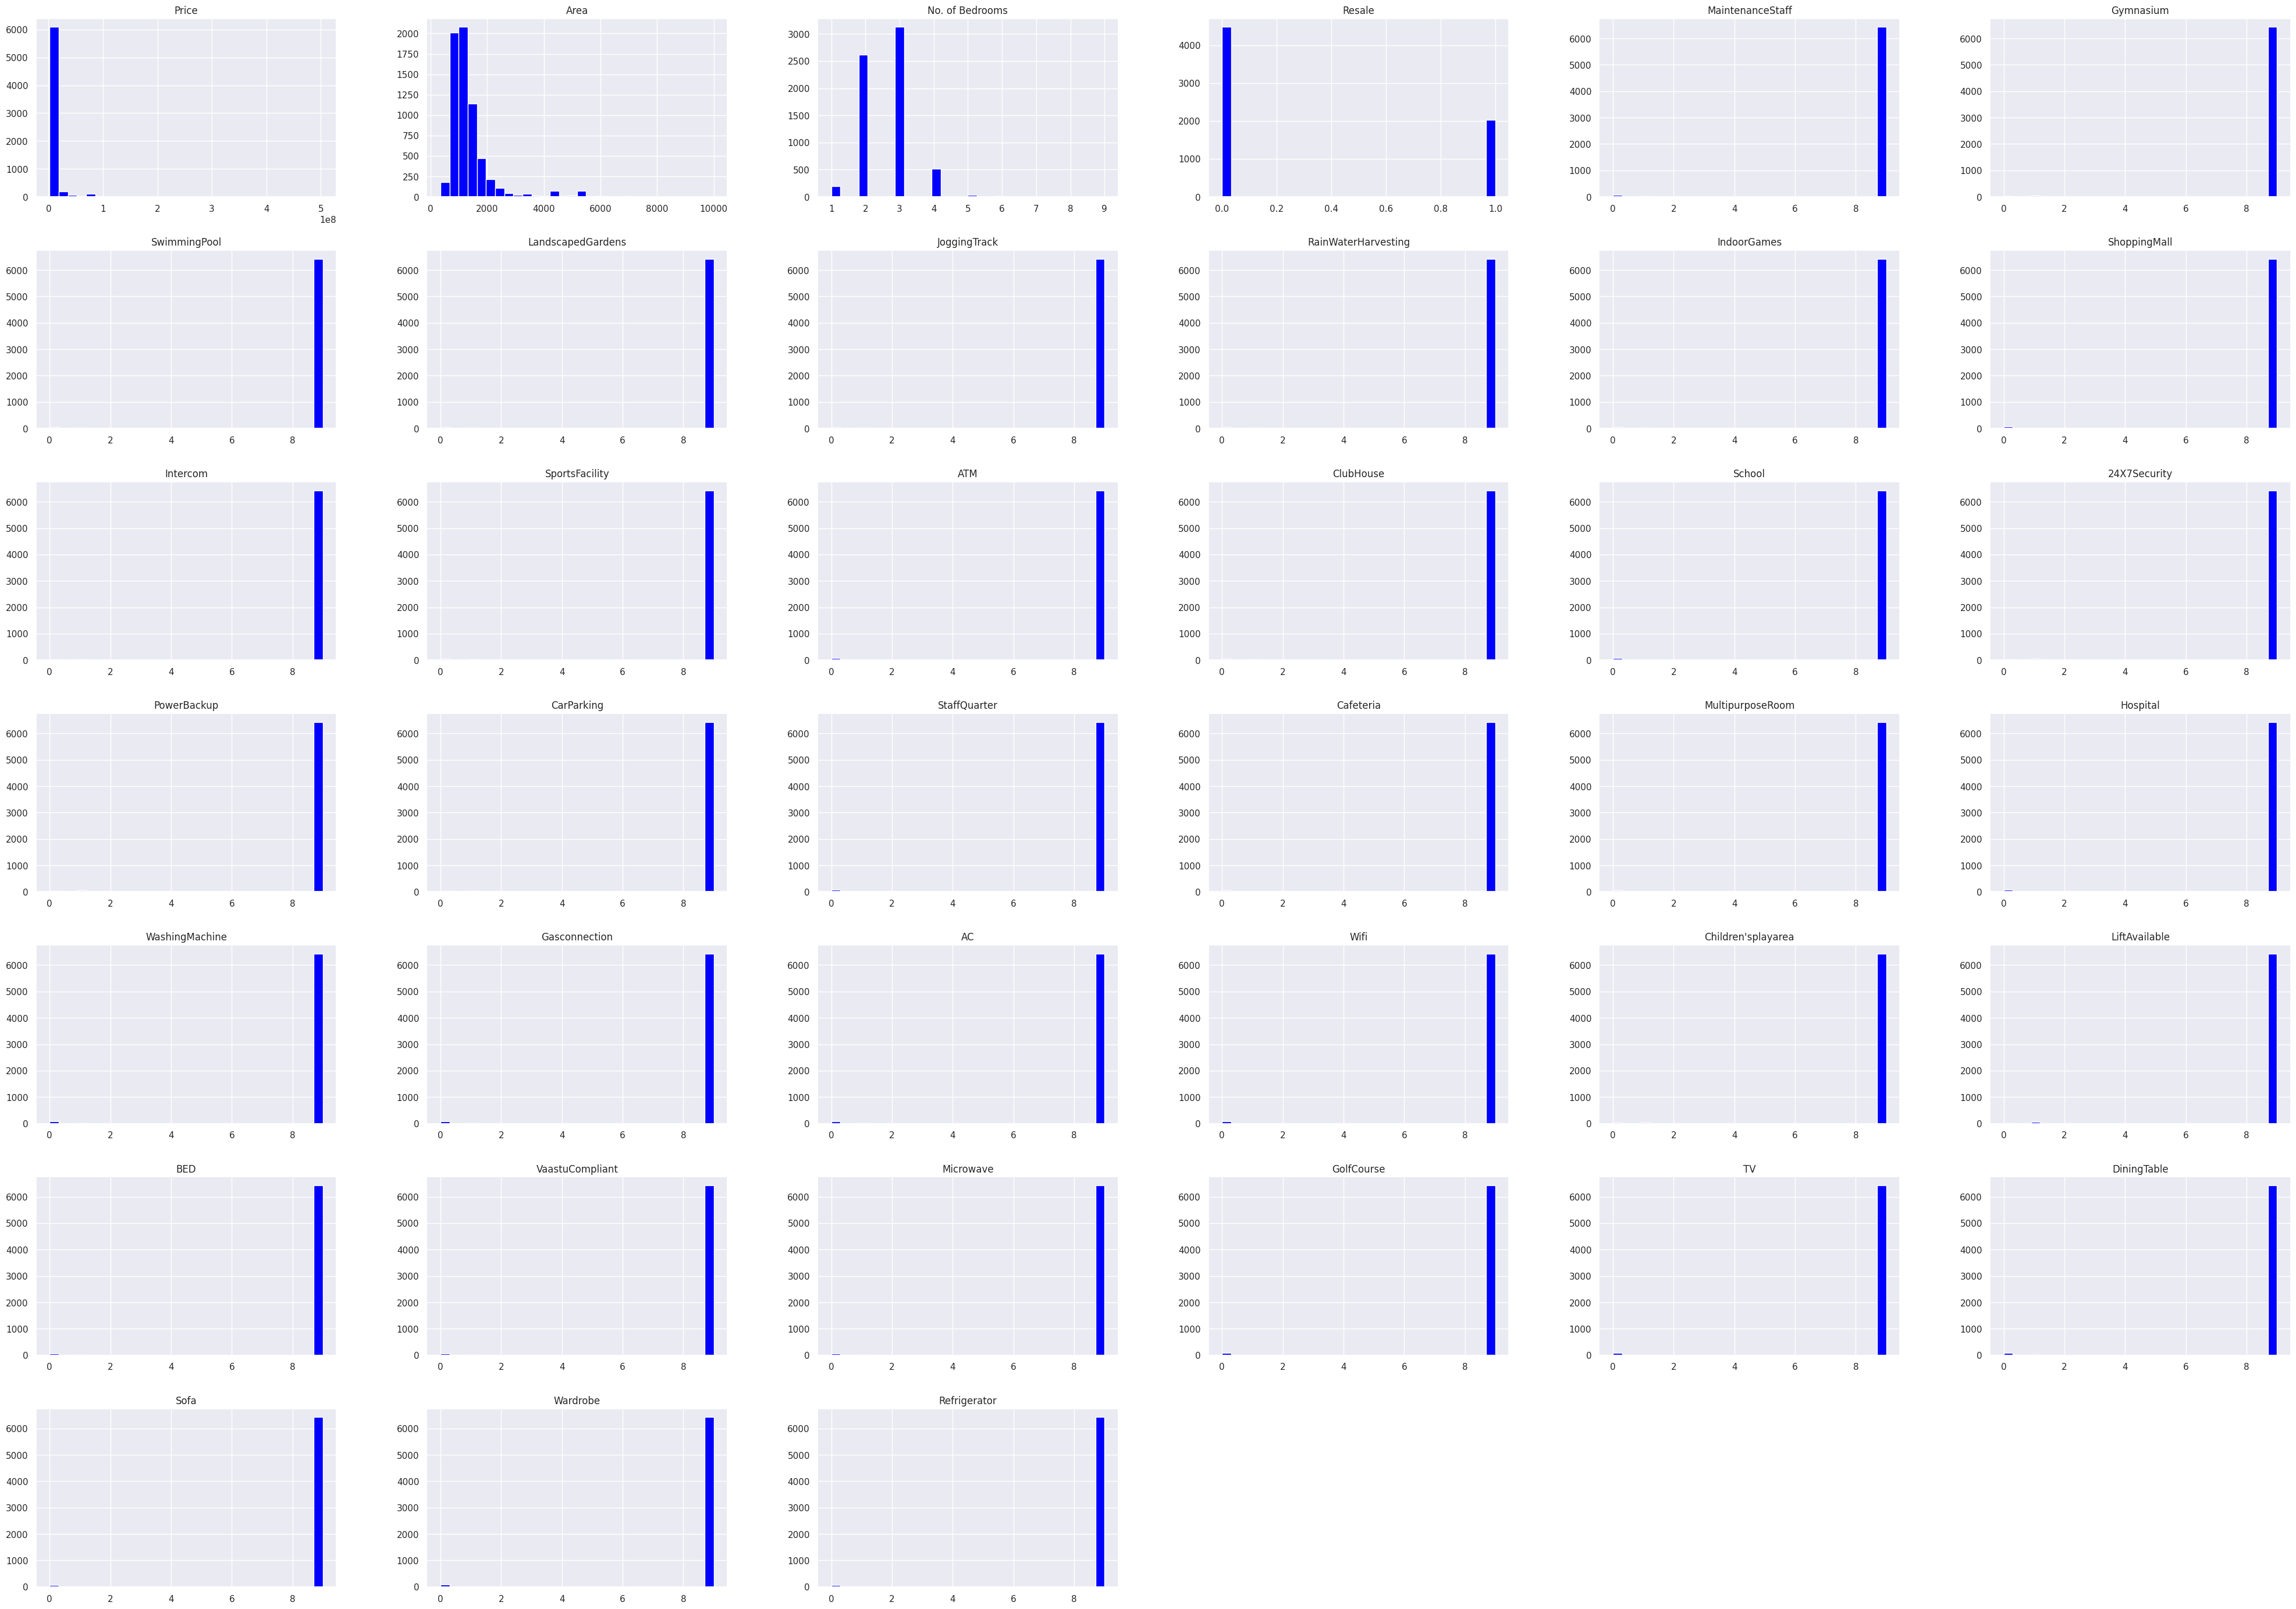

In [ ]:
df.hist(bins = 30, figsize=(50, 35), color = 'blue');

In [ ]:
X = df.drop(['No. of Bedrooms'], axis=1)
y = np.log(df['No. of Bedrooms']) # Applying log transformation, to deal with the Skewing

### Label Encoding the categorical attribute

In [ ]:
encoder=LabelEncoder()
X['Location']=encoder.fit_transform(X['Location'])

### Scaling

In [ ]:
X.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,37,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,151,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,237,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,191,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,204,1,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("RMSE: {:.2%}".format(rmse))
print("R-square: {:.2%}".format(r2))

RMSE: 24.66%
R-square: 31.45%
